<h1 style="font-family: 'Times New Roman'; letter-spacing: 0.08em;">Importing the Essential Libraries</h1>

In [54]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score,confusion_matrix,precision_score, f1_score, roc_auc_score,roc_curve,recall_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


 
     

<h1 style="font-family: 'Times New Roman'; letter-spacing: 0.08em;">Load the Data</h1>

In [3]:
data = pd.read_csv(r"E:\project python\Credit Scoring Prediction\predicted_credit_scores.csv")

<h1 style="font-family: 'Times New Roman'; letter-spacing: 0.08em;">Data Preprocessing</h1>

In [4]:
data

,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Predicted_Credit_Score
0,23.0,Scientist,19114.12,1824.843333,3,4,3,4.0,3,7.0,...,2022.0,Good,809.98,35.030402,No,49.574949,236.642682,Low_spent_Small_value_payments,186.266702,Standard/Poor
1,24.0,Scientist,19114.12,1824.843333,3,4,3,4.0,3,9.0,...,4.0,Good,809.98,33.053114,No,49.574949,21.465380,High_spent_Medium_value_payments,361.444004,Standard/Poor
2,24.0,Scientist,19114.12,1824.843333,3,4,3,4.0,-1,4.0,...,4.0,Good,809.98,33.811894,No,49.574949,148.233938,Low_spent_Medium_value_payments,264.675446,Good
3,28.0,_______,34847.84,3037.986667,2,4,6,1.0,3,1.0,...,5.0,Good,605.03,25.926822,No,18.816215,39.684018,High_spent_Large_value_payments,485.298434,Good
4,28.0,Teacher,34847.84,3037.986667,2,4,6,1.0,3,3.0,...,5.0,Good,605.03,30.116600,No,18.816215,251.627369,Low_spent_Large_value_payments,303.355083,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27336,29.0,Architect,20002.88,1929.906667,10,8,29,5.0,33,25.0,...,9.0,Bad,3571.70,32.391288,Yes,60.964772,107.210742,Low_spent_Small_value_payments,314.815153,Standard/Poor
27337,29.0,Architect,20002.88,1929.906667,10,8,29,5.0,33,25.0,...,12.0,Bad,3571.70,37.528511,Yes,60.964772,71.794421,Low_spent_Small_value_payments,350.231473,Standard/Poor
27338,29.0,_______,20002.88,1929.906667,10,8,29,5.0,33,22.0,...,12.0,Bad,3571.70,27.027812,Yes,60.964772,50.846847,High_spent_Small_value_payments,341.179047,Standard/Poor
27339,4975.0,Architect,20002.88,1929.906667,10,8,29,5.0,33,25.0,...,12.0,_,3571.70,34.780553,Yes,60.964772,146.486325,Low_spent_Small_value_payments,275.539570,Standard/Poor


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27341 entries, 0 to 27340
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       27341 non-null  float64
 1   Occupation                27341 non-null  object 
 2   Annual_Income             27341 non-null  float64
 3   Monthly_Inhand_Salary     27341 non-null  float64
 4   Num_Bank_Accounts         27341 non-null  int64  
 5   Num_Credit_Card           27341 non-null  int64  
 6   Interest_Rate             27341 non-null  int64  
 7   Num_of_Loan               27341 non-null  float64
 8   Delay_from_due_date       27341 non-null  int64  
 9   Num_of_Delayed_Payment    27341 non-null  float64
 10  Changed_Credit_Limit      27341 non-null  float64
 11  Num_Credit_Inquiries      27341 non-null  float64
 12  Credit_Mix                27341 non-null  object 
 13  Outstanding_Debt          27341 non-null  float64
 14  Credit

In [23]:
data.describe()


,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
count,27341.000000,2.734100e+04,27341.000000,27341.000000,27341.000000,27341.000000,27341.000000,27341.000000,27341.000000,27341.000000,27341.000000,27341.000000,27341.000000,27341.000000,27341.000000,27341.000000
mean,118.690721,1.615163e+05,4143.201845,17.041988,22.711459,71.358546,3.035661,21.052193,30.067774,10.313636,31.600161,1422.657161,32.329814,1513.987499,187.401723,403.086549
std,694.347933,1.303101e+06,3159.249228,117.668417,128.680230,465.177509,64.477586,14.852041,213.492654,6.775385,205.771851,1149.107183,5.089363,8732.904137,182.193339,212.508827
min,14.000000,7.005930e+03,303.645417,-1.000000,0.000000,1.000000,-100.000000,-5.000000,-3.000000,-6.450000,0.000000,0.340000,21.367496,0.000000,0.000000,0.103402
25%,25.000000,1.933153e+04,1618.485833,3.000000,4.000000,7.000000,1.000000,10.000000,9.000000,5.250000,4.000000,566.860000,28.118950,31.649965,71.811671,270.846485
50%,34.000000,3.708088e+04,3055.160000,6.000000,6.000000,13.000000,3.000000,18.000000,14.000000,9.370000,7.000000,1164.350000,32.367546,74.087584,127.802675,337.731773
75%,43.000000,7.200070e+04,5885.676667,7.000000,7.000000,20.000000,5.000000,28.000000,18.000000,14.680000,10.000000,1941.840000,36.487193,172.653062,230.556145,472.214950
max,8688.000000,2.413726e+07,15204.633333,1783.000000,1499.000000,5759.000000,1496.000000,67.000000,4335.000000,36.650000,2593.000000,4998.070000,48.540663,82091.000000,1539.635702,1606.518192


In [7]:
print("🔹 Dataset Shape (rows, columns):", data.shape)

🔹 Dataset Shape (rows, columns): (27341, 21)


In [8]:
data.columns

Index(['Age', 'Occupation', 'Annual_Income', 'Monthly_Inhand_Salary',
       'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Payment_of_Min_Amount',
       'Total_EMI_per_month', 'Amount_invested_monthly', 'Payment_Behaviour',
       'Monthly_Balance', 'Predicted_Credit_Score'],
      dtype='object')

In [9]:
data.isnull().sum()

Age                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Predicted_Credit_Score      0
dtype: int64

In [12]:
def remove_outliers_iqr(df, columns):
    for col in columns:
        if df[col].dtype in ['int64', 'float64']:
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            # فلترة البيانات بدون Outliers
            df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

numeric_cols = [
    'Age', 'Annual_Income', 'Monthly_Inhand_Salary',
    'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate',
    'Num_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment',
    'Changed_Credit_Limit', 'Num_Credit_Inquiries',
    'Outstanding_Debt', 'Credit_Utilization_Ratio','Payment_of_Min_Amount',
    'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance'
]


data_cleaned = remove_outliers_iqr(data, numeric_cols)


print(f"Original shape: {data.shape}")
print(f"After IQR cleaning: {data_cleaned.shape}")


Original shape: (27341, 21)
After IQR cleaning: (15910, 21)


In [13]:
data_cleaned

,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Predicted_Credit_Score
1,24.0,Scientist,19114.12,1824.843333,3,4,3,4.0,3,9.0,...,4.0,Good,809.98,33.053114,No,49.574949,21.465380,High_spent_Medium_value_payments,361.444004,Standard/Poor
2,24.0,Scientist,19114.12,1824.843333,3,4,3,4.0,-1,4.0,...,4.0,Good,809.98,33.811894,No,49.574949,148.233938,Low_spent_Medium_value_payments,264.675446,Good
3,28.0,_______,34847.84,3037.986667,2,4,6,1.0,3,1.0,...,5.0,Good,605.03,25.926822,No,18.816215,39.684018,High_spent_Large_value_payments,485.298434,Good
4,28.0,Teacher,34847.84,3037.986667,2,4,6,1.0,3,3.0,...,5.0,Good,605.03,30.116600,No,18.816215,251.627369,Low_spent_Large_value_payments,303.355083,Good
7,55.0,Entrepreneur,30689.89,2612.490833,2,5,4,1.0,5,6.0,...,4.0,Good,632.46,39.377219,No,16.415452,69.107006,High_spent_Medium_value_payments,425.726626,Standard/Poor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27332,45.0,Media_Manager,16680.35,1528.029167,1,1,5,4.0,1,0.0,...,8.0,Good,897.16,39.153349,No,41.113561,101.813161,Low_spent_Medium_value_payments,289.876195,Good
27336,29.0,Architect,20002.88,1929.906667,10,8,29,5.0,33,25.0,...,9.0,Bad,3571.70,32.391288,Yes,60.964772,107.210742,Low_spent_Small_value_payments,314.815153,Standard/Poor
27337,29.0,Architect,20002.88,1929.906667,10,8,29,5.0,33,25.0,...,12.0,Bad,3571.70,37.528511,Yes,60.964772,71.794421,Low_spent_Small_value_payments,350.231473,Standard/Poor
27338,29.0,_______,20002.88,1929.906667,10,8,29,5.0,33,22.0,...,12.0,Bad,3571.70,27.027812,Yes,60.964772,50.846847,High_spent_Small_value_payments,341.179047,Standard/Poor


In [14]:
data_cleaned.isnull().sum()

Age                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Predicted_Credit_Score      0
dtype: int64

In [15]:
from sklearn.preprocessing import LabelEncoder

label_cols = ['Occupation', 'Credit_Mix', 'Payment_Behaviour','Payment_of_Min_Amount','Predicted_Credit_Score']
le = LabelEncoder()
for col in label_cols:
    data_cleaned[col] = le.fit_transform(data_cleaned[col])
    
    
X = data_cleaned.drop(['Predicted_Credit_Score'], axis=1)
y = data_cleaned['Predicted_Credit_Score']

y = le.fit_transform(y)
y


array([1, 0, 0, ..., 1, 1, 1], dtype=int64)

In [16]:
data_cleaned

,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Predicted_Credit_Score
1,24.0,12,19114.12,1824.843333,3,4,3,4.0,3,9.0,...,4.0,1,809.98,33.053114,1,49.574949,21.465380,2,361.444004,1
2,24.0,12,19114.12,1824.843333,3,4,3,4.0,-1,4.0,...,4.0,1,809.98,33.811894,1,49.574949,148.233938,5,264.675446,0
3,28.0,15,34847.84,3037.986667,2,4,6,1.0,3,1.0,...,5.0,1,605.03,25.926822,1,18.816215,39.684018,1,485.298434,0
4,28.0,13,34847.84,3037.986667,2,4,6,1.0,3,3.0,...,5.0,1,605.03,30.116600,1,18.816215,251.627369,4,303.355083,0
7,55.0,5,30689.89,2612.490833,2,5,4,1.0,5,6.0,...,4.0,1,632.46,39.377219,1,16.415452,69.107006,2,425.726626,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27332,45.0,10,16680.35,1528.029167,1,1,5,4.0,1,0.0,...,8.0,1,897.16,39.153349,1,41.113561,101.813161,5,289.876195,0
27336,29.0,1,20002.88,1929.906667,10,8,29,5.0,33,25.0,...,9.0,0,3571.70,32.391288,2,60.964772,107.210742,6,314.815153,1
27337,29.0,1,20002.88,1929.906667,10,8,29,5.0,33,25.0,...,12.0,0,3571.70,37.528511,2,60.964772,71.794421,6,350.231473,1
27338,29.0,15,20002.88,1929.906667,10,8,29,5.0,33,22.0,...,12.0,0,3571.70,27.027812,2,60.964772,50.846847,3,341.179047,1


In [29]:
print("\n🔹 Distribution of Predicted_Credit_Score:")
print(data_cleaned['Predicted_Credit_Score'].value_counts())


🔹 Distribution of Predicted_Credit_Score:
1    13902
0     2008
Name: Predicted_Credit_Score, dtype: int64


<h1 style="font-family: 'Times New Roman'; letter-spacing: 0.08em;">Spliting Data</h1>

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


X_train.shape, X_test.shape, y_train.shape, y_test.shape

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (12728, 20)
Shape of X_test: (3182, 20)
Shape of y_train: (12728,)
Shape of y_test: (3182,)


<h1 style="font-family: 'Times New Roman'; letter-spacing: 0.08em;">Visualization</h1>

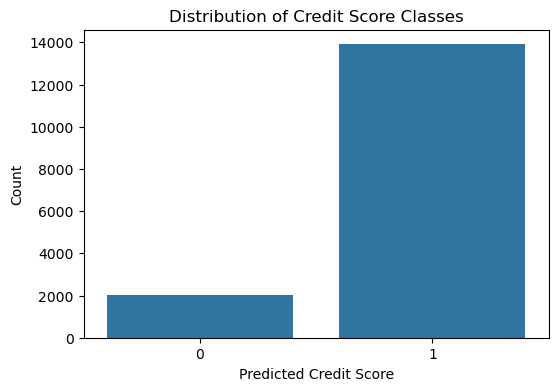

In [40]:

plt.figure(figsize=(6,4))
sns.countplot(x=y)
plt.title("Distribution of Credit Score Classes")
plt.xlabel("Predicted Credit Score")
plt.ylabel("Count")
plt.show()


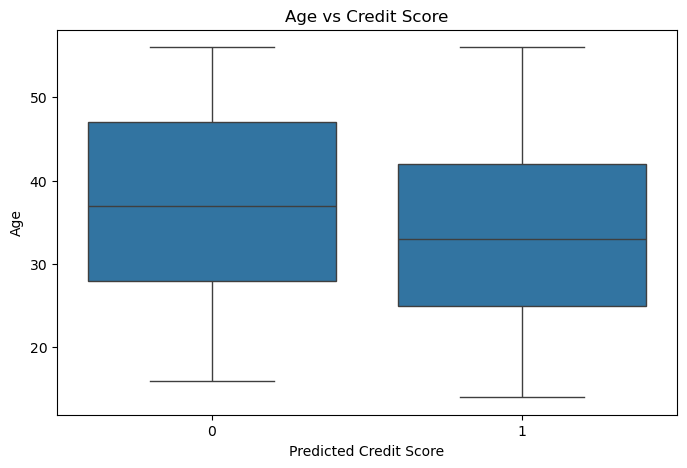

In [41]:
plt.figure(figsize=(8,5))
sns.boxplot(x=y, y=X['Age'])
plt.title("Age vs Credit Score")
plt.xlabel("Predicted Credit Score")
plt.ylabel("Age")
plt.show()


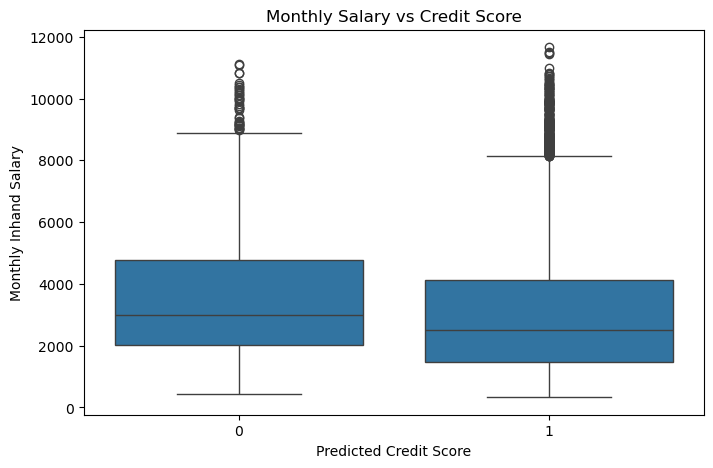

In [42]:
plt.figure(figsize=(8,5))
sns.boxplot(x=y, y=X['Monthly_Inhand_Salary'])
plt.title("Monthly Salary vs Credit Score")
plt.xlabel("Predicted Credit Score")
plt.ylabel("Monthly Inhand Salary")
plt.show()


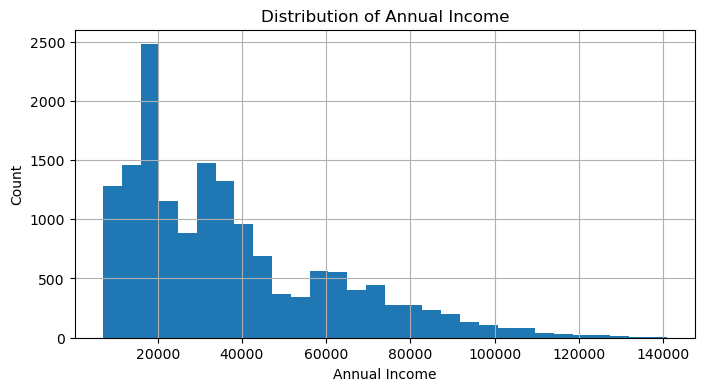

In [43]:
X['Annual_Income'].hist(bins=30, figsize=(8,4))
plt.title("Distribution of Annual Income")
plt.xlabel("Annual Income")
plt.ylabel("Count")
plt.show()


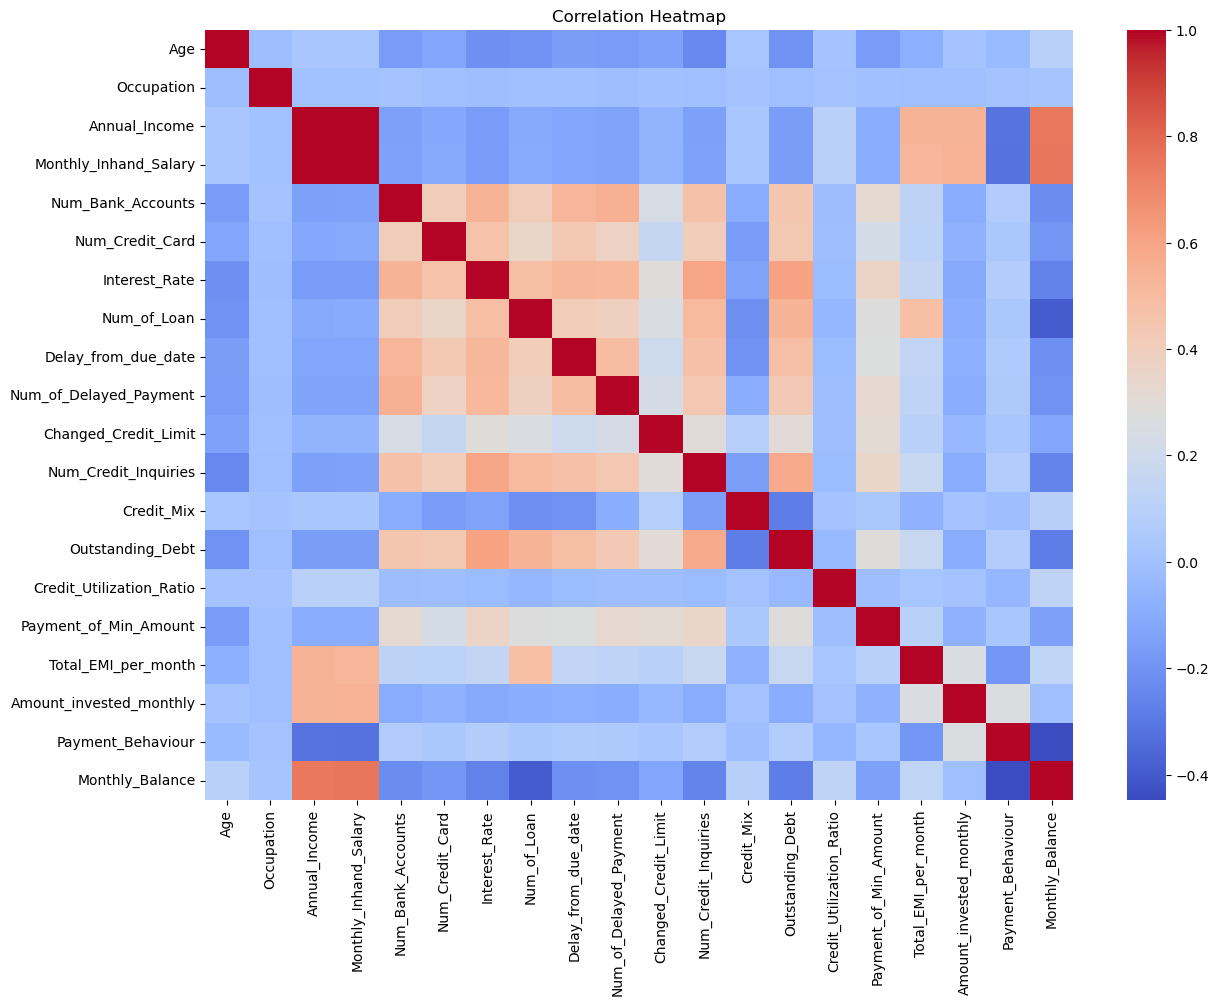

In [44]:
plt.figure(figsize=(14,10))
sns.heatmap(X.corr(), cmap='coolwarm', annot=False)
plt.title("Correlation Heatmap")
plt.show()


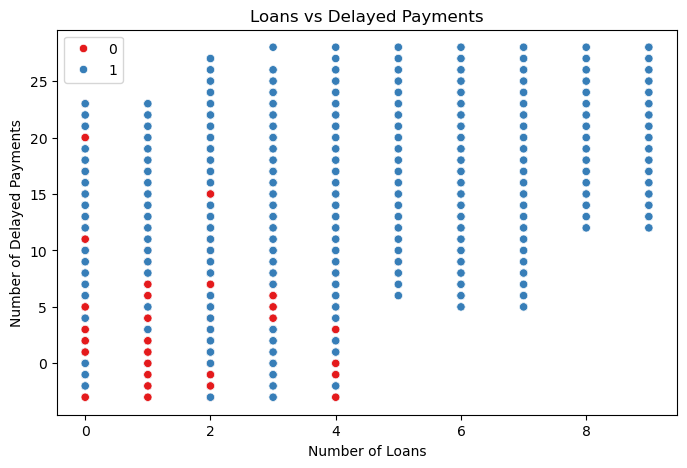

In [45]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=X['Num_of_Loan'], y=X['Num_of_Delayed_Payment'], hue=y, palette='Set1')
plt.title("Loans vs Delayed Payments")
plt.xlabel("Number of Loans")
plt.ylabel("Number of Delayed Payments")
plt.show()


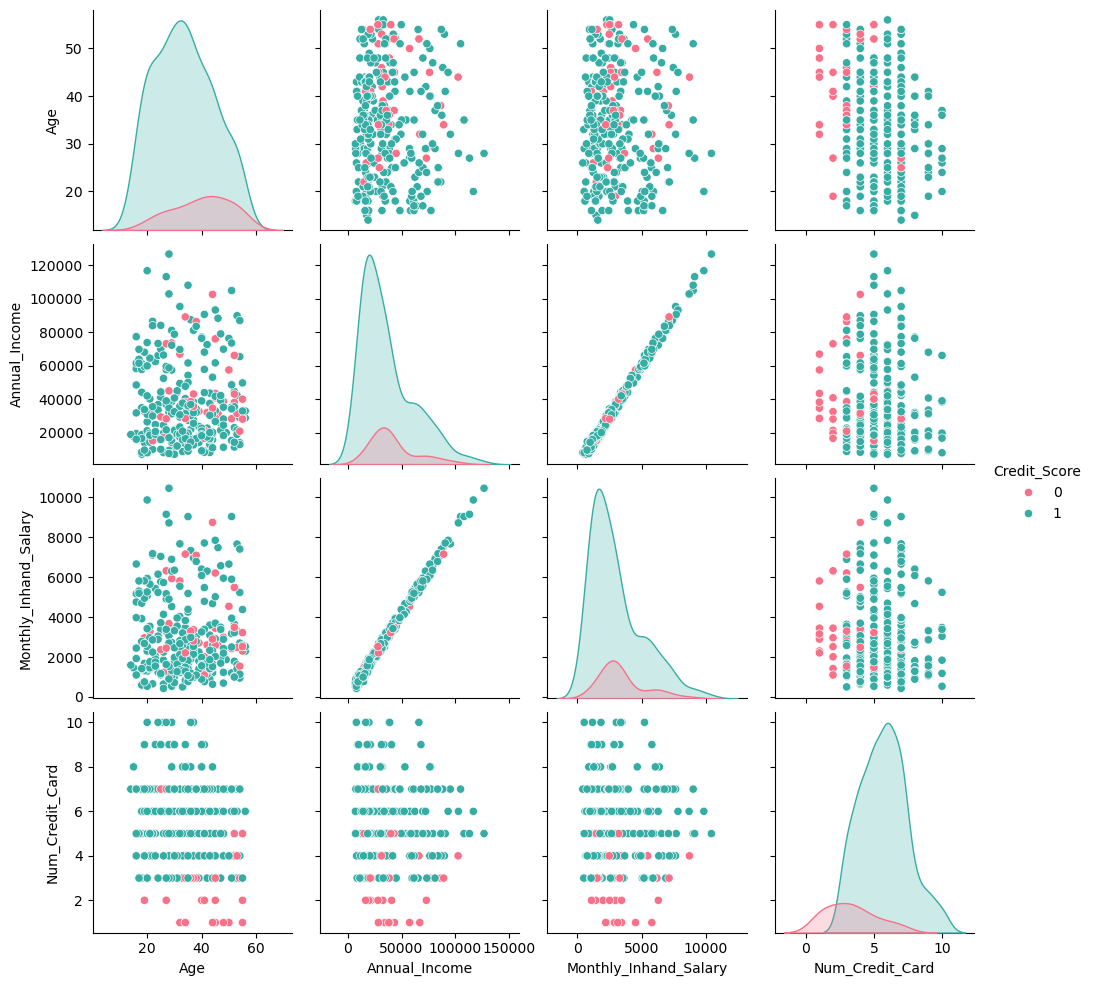

In [ ]:
sample = X.copy()
sample['Credit_Score'] = y
sample = sample.sample(300, random_state=1)


sns.pairplot(sample[['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Credit_Card', 'Credit_Score']], hue='Credit_Score', palette='husl')
plt.show()

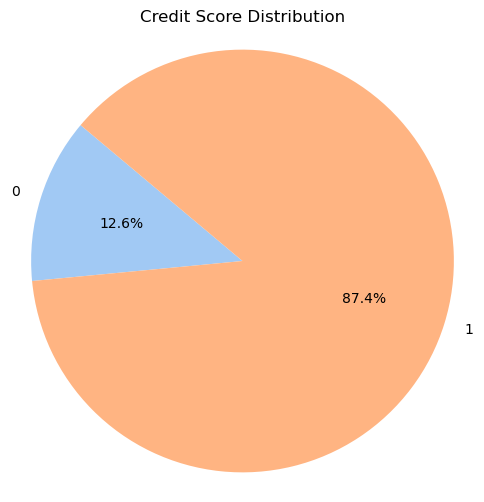

In [49]:
y_labels, y_counts = np.unique(y, return_counts=True)
plt.figure(figsize=(6,6))
plt.pie(y_counts, labels=y_labels, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
plt.title("Credit Score Distribution")
plt.axis('equal')
plt.show()


<h1 style="font-family: 'Times New Roman'; letter-spacing: 0.08em;">Models </h1>

In [55]:
def evaluate_model(model, X_test, y_test, model_name="Model"):
    y_pred = model.predict(X_test)

    print(f"📌 Evaluation for {model_name}:")
    print("Accuracy: ", accuracy_score(y_test, y_pred))
    print("Precision: ", precision_score(y_test, y_pred, average='weighted'))
    print("Recall: ", recall_score(y_test, y_pred, average='weighted'))
    print("F1 Score: ", f1_score(y_test, y_pred, average='weighted'))

    # ROC-AUC only if it's binary or can use predict_proba
    if hasattr(model, "predict_proba"):
        try:
            y_proba = model.predict_proba(X_test)
            if y_proba.shape[1] == 2:
                roc_auc = roc_auc_score(y_test, y_proba[:, 1])
                print("ROC-AUC: ", roc_auc)
            else:
                roc_auc = roc_auc_score(y_test, y_proba, multi_class='ovr')
                print("ROC-AUC (multi-class): ", roc_auc)
        except:
            print("ROC-AUC not available.")
    print("-" * 50)


In [61]:
models = {
    "Logistic Regression": lr,
    "Decision Tree": dt,
    "Random Forest": rf
}

for name, model in models.items():
    evaluate_model(model, X_test, y_test, name)


📌 Evaluation for Logistic Regression:
Accuracy:  0.8978629792583281
Precision:  0.8878539556114364
Recall:  0.8978629792583281
F1 Score:  0.8899241993030567
ROC-AUC:  0.9365959595959596
--------------------------------------------------
📌 Evaluation for Decision Tree:
Accuracy:  0.9101194217473287
Precision:  0.9101194217473287
Recall:  0.9101194217473287
F1 Score:  0.9101194217473287
ROC-AUC:  0.8084907407407407
--------------------------------------------------
📌 Evaluation for Random Forest:
Accuracy:  0.9371464487743557
Precision:  0.9340476225278821
Recall:  0.9371464487743557
F1 Score:  0.9340774974745566
ROC-AUC:  0.9749570707070707
--------------------------------------------------


C:\Users\Teto\AppData\Local\Temp\ipykernel_23528\270183739.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feat_imp_df.head(15), palette='viridis')


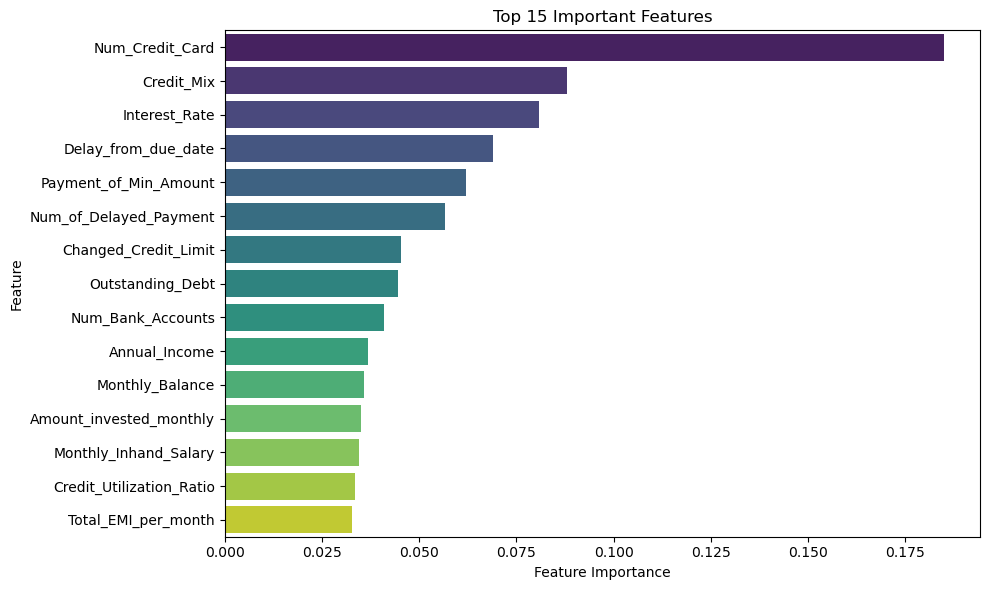

In [70]:

importances = rf.feature_importances_
feature_names = X.columns
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feat_imp_df.head(15), palette='viridis')
plt.title("Top 15 Important Features")
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()